In [313]:
import pandas as pd   
import numpy as np     
import matplotlib .pyplot as plt    
import seaborn as sns
import statsmodels.api as sm



In [314]:
df = pd.read_csv(r"C:\Users\HP\Documents\Projects Data\Student data.csv")

In [315]:
df.tail()

,Health,Attendance,scholarship staus,GPA1,GPA2,GPA3,CGPA,Risk
200,Stable,Excellent,Safe,3.74,3.25,4.00,3.66,Low Risk
201,Stable,Excellent,Safe,3.88,3.25,4.00,3.78,Low Risk
202,Stable,Excellent,Safe,3.48,3.25,3.72,3.64,Low Risk
203,Stable,Excellent,Uncertain,3.48,3.25,2.78,3.32,Low Risk
204,Stable,Excellent,Uncertain,3.27,3.34,3.11,3.26,Low Risk


In [316]:
df.head()

,Health,Attendance,scholarship staus,GPA1,GPA2,GPA3,CGPA,Risk
0,Stable,Excellent,Safe,3.44,3.25,3.65,3.65,Low Risk
1,Stable,Poor,Uncertain,3.44,3.25,2.28,2.28,High Risk
2,Stable,Excellent,Safe,3.21,2.67,3.33,3.42,Low Risk
3,Stable,Excellent,Safe,3.44,2.95,3.33,3.43,Low Risk
4,Stable,Excellent,Safe,3.72,3.25,3.42,3.51,Low Risk


# Data preprocesseing:

## checking missing values:

In [317]:
df.isnull().sum()

Health               0
Attendance           0
scholarship staus    0
GPA1                 0
GPA2                 0
GPA3                 0
CGPA                 0
Risk                 0
dtype: int64

## checking duplicates

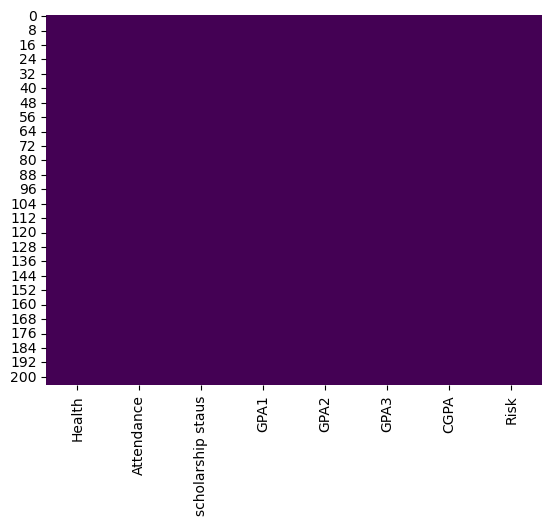

In [318]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [319]:
df.duplicated().sum()

0

## checking info:

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Health             205 non-null    object 
 1   Attendance         205 non-null    object 
 2   scholarship staus  205 non-null    object 
 3   GPA1               205 non-null    float64
 4   GPA2               205 non-null    float64
 5   GPA3               205 non-null    float64
 6   CGPA               205 non-null    float64
 7   Risk               205 non-null    object 
dtypes: float64(4), object(4)
memory usage: 12.9+ KB


In [321]:
df.describe()

,GPA1,GPA2,GPA3,CGPA
count,205.000000,205.00000,205.000000,205.000000
mean,3.328537,3.23078,3.297317,3.378780
std,0.634786,0.52215,0.615826,0.377097
min,0.000000,0.00000,0.000000,2.080000
25%,3.260000,3.25000,3.110000,3.240000
50%,3.490000,3.25000,3.420000,3.460000
75%,3.700000,3.25000,3.690000,3.640000
max,4.000000,3.96000,4.000000,3.920000


# Data analysis:

In [322]:
df.head()

,Health,Attendance,scholarship staus,GPA1,GPA2,GPA3,CGPA,Risk
0,Stable,Excellent,Safe,3.44,3.25,3.65,3.65,Low Risk
1,Stable,Poor,Uncertain,3.44,3.25,2.28,2.28,High Risk
2,Stable,Excellent,Safe,3.21,2.67,3.33,3.42,Low Risk
3,Stable,Excellent,Safe,3.44,2.95,3.33,3.43,Low Risk
4,Stable,Excellent,Safe,3.72,3.25,3.42,3.51,Low Risk


In [323]:
df = df.rename(columns={'ATTENDANCE': 'attendance', 'scholarship staus':'scholarship','HEALTH':'health','GPA1':'gpa1', 'GPA2':'gpa2','GPA3':'gpa3','CGPA':'cgpa'})

df = df.rename(columns={'ATTENDANCE': 'attendance', 'SCHOLARSHIP':'scholarship','HEALTH':'health','GPA1':'gpa1', 'GPA2':'gpa2','GPA3':'gpa3','CGPA':'cgpa'})

df = df.rename(columns={'Attendance': 'attendance', 'SCHOLARSHIP':'scholarship','Health':'health','GPA1':'gpa1', 'GPA2':'gpa2','GPA3':'gpa3','CGPA':'cgpa'})

In [324]:
df['health'].value_counts()

health
Stable       179
Unstable      22
Critical       3
 Unstable      1
Name: count, dtype: int64

In [325]:
df.head()

,health,attendance,scholarship,gpa1,gpa2,gpa3,cgpa,Risk
0,Stable,Excellent,Safe,3.44,3.25,3.65,3.65,Low Risk
1,Stable,Poor,Uncertain,3.44,3.25,2.28,2.28,High Risk
2,Stable,Excellent,Safe,3.21,2.67,3.33,3.42,Low Risk
3,Stable,Excellent,Safe,3.44,2.95,3.33,3.43,Low Risk
4,Stable,Excellent,Safe,3.72,3.25,3.42,3.51,Low Risk


#### there is a proplem in element number 4, let's fix it by deleting the whole row

#### but we don't know the number of it's index, let's check it:

In [326]:
df1 = df[df['health'] == " Unstable"]


In [327]:
df1

,health,attendance,scholarship,gpa1,gpa2,gpa3,cgpa,Risk
8,Unstable,Excellent,Safe,3.78,3.25,2.79,3.22,Low Risk


###### then delete through below code:

df.drop(8, axis=0, inplace=True)

In [328]:
df['health'].value_counts()

health
Stable       179
Unstable      22
Critical       3
 Unstable      1
Name: count, dtype: int64

#### Done

In [329]:
df.head()

,health,attendance,scholarship,gpa1,gpa2,gpa3,cgpa,Risk
0,Stable,Excellent,Safe,3.44,3.25,3.65,3.65,Low Risk
1,Stable,Poor,Uncertain,3.44,3.25,2.28,2.28,High Risk
2,Stable,Excellent,Safe,3.21,2.67,3.33,3.42,Low Risk
3,Stable,Excellent,Safe,3.44,2.95,3.33,3.43,Low Risk
4,Stable,Excellent,Safe,3.72,3.25,3.42,3.51,Low Risk


In [330]:
df.groupby('health')['attendance'].value_counts()

health     attendance
 Unstable  Excellent       1
Critical   Irregular       2
           Poor            1
Stable     Excellent     147
           Irregular      25
           Poor            4
           Excellent       2
           Poor            1
Unstable   Excellent      14
           Irregular       6
           Excellent       1
           Poor            1
Name: count, dtype: int64

In [331]:
df['attendance'].value_counts()

attendance
Excellent     162
Irregular      33
Poor            4
Excellent       3
Poor            3
Name: count, dtype: int64

##### It looks we have some spacese in 'Excellent ' and  'Poor ', lets remove the spacese 



In [332]:
df2 = df[df['attendance'] == 'Poor ']

In [333]:
df2

,health,attendance,scholarship,gpa1,gpa2,gpa3,cgpa,Risk
1,Stable,Poor,Uncertain,3.44,3.25,2.28,2.28,High Risk
21,Stable,Poor,Uncertain,3.61,3.25,2.38,2.38,High Risk
32,Stable,Poor,Uncertain,3.75,0.00,1.32,2.39,High Risk
195,Stable,Poor,Uncertain,1.20,3.25,3.34,2.60,High Risk


In [334]:
df3 = df[df['attendance'] == 'Excellent ']

In [335]:
df3

,health,attendance,scholarship,gpa1,gpa2,gpa3,cgpa,Risk
0,Stable,Excellent,Safe,3.44,3.25,3.65,3.65,Low Risk
2,Stable,Excellent,Safe,3.21,2.67,3.33,3.42,Low Risk
24,Unstable,Excellent,Safe,3.47,3.25,3.47,3.23,Low Risk


In [336]:
df['attendance'] = df['attendance'].replace({'Poor ': 'Poor'})

In [337]:
df['attendance'] = df['attendance'].replace({'Excellent ': 'Excellent'})

In [338]:
df['attendance'].value_counts()

attendance
Excellent    165
Irregular     33
Poor           7
Name: count, dtype: int64

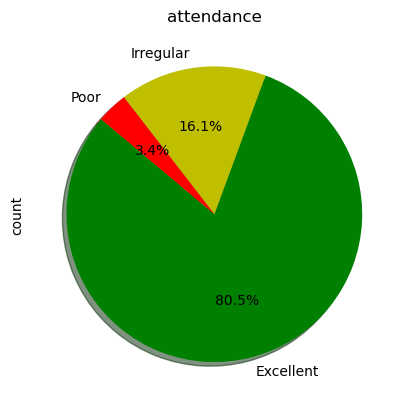

In [339]:
# Plot the pie chart
df['attendance'].value_counts().plot(kind='pie', colors=["g", "y", "r"], autopct='%1.1f%%', startangle=140, shadow=True)

# Add a title
plt.title('attendance')

# Show the plot
plt.show()

## Done

In [340]:
df['scholarship'].value_counts()

scholarship
Safe          117
Uncertain      82
Endangered      5
Uncertain       1
Name: count, dtype: int64

#### there is a proplem in element "Uncertain", it had repeated 2 times, let's fix it by deleting the whole row

In [341]:
df5 = df[df['scholarship'] == "Uncertain "]

In [342]:
df5

,health,attendance,scholarship,gpa1,gpa2,gpa3,cgpa,Risk
21,Stable,Poor,Uncertain,3.61,3.25,2.38,2.38,High Risk


#### Index number 21

In [343]:
df.drop(21, axis=0, inplace=True)

In [344]:
df['scholarship'].value_counts()

scholarship
Safe          117
Uncertain      82
Endangered      5
Name: count, dtype: int64

#### Done

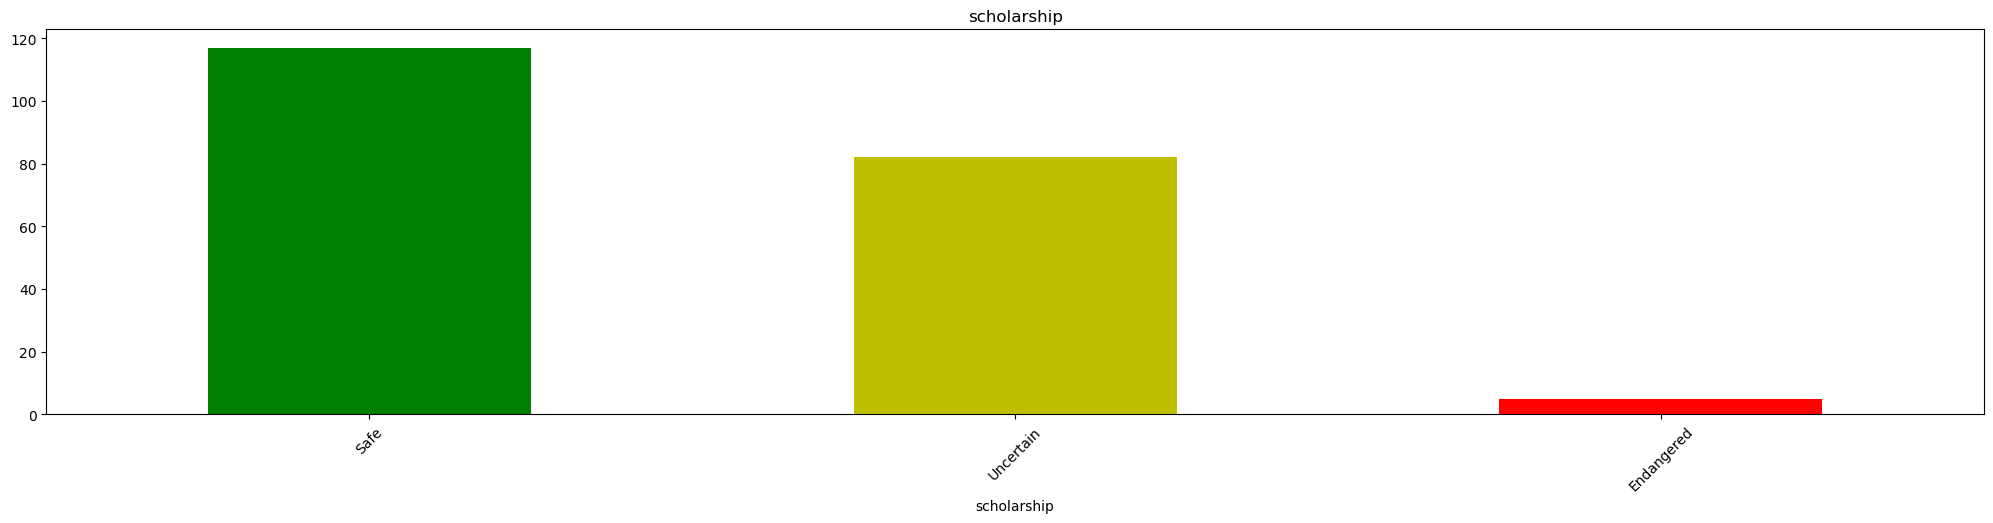

In [345]:
df['scholarship'].value_counts().sort_values(ascending=False).plot(kind='bar', color=["g", "y", "r"], figsize=(25,5))

plt.title('scholarship')  
plt.xticks(rotation=45)

plt.show()


## Let's check the correlation between "Health" and "Risk"

In [346]:
df.head()

,health,attendance,scholarship,gpa1,gpa2,gpa3,cgpa,Risk
0,Stable,Excellent,Safe,3.44,3.25,3.65,3.65,Low Risk
1,Stable,Poor,Uncertain,3.44,3.25,2.28,2.28,High Risk
2,Stable,Excellent,Safe,3.21,2.67,3.33,3.42,Low Risk
3,Stable,Excellent,Safe,3.44,2.95,3.33,3.43,Low Risk
4,Stable,Excellent,Safe,3.72,3.25,3.42,3.51,Low Risk


In [347]:
df.reset_index()


,index,health,attendance,scholarship,gpa1,gpa2,gpa3,cgpa,Risk
0,0,Stable,Excellent,Safe,3.44,3.25,3.65,3.65,Low Risk
1,1,Stable,Poor,Uncertain,3.44,3.25,2.28,2.28,High Risk
2,2,Stable,Excellent,Safe,3.21,2.67,3.33,3.42,Low Risk
3,3,Stable,Excellent,Safe,3.44,2.95,3.33,3.43,Low Risk
4,4,Stable,Excellent,Safe,3.72,3.25,3.42,3.51,Low Risk
...,...,...,...,...,...,...,...,...,...
199,200,Stable,Excellent,Safe,3.74,3.25,4.00,3.66,Low Risk
200,201,Stable,Excellent,Safe,3.88,3.25,4.00,3.78,Low Risk
201,202,Stable,Excellent,Safe,3.48,3.25,3.72,3.64,Low Risk
202,203,Stable,Excellent,Uncertain,3.48,3.25,2.78,3.32,Low Risk


In [348]:
df['Risk'].value_counts()

Risk
Low Risk       177
High Risk       20
Medium Risk      7
Name: count, dtype: int64

In [349]:
print(df.dtypes)


health          object
attendance      object
scholarship     object
gpa1           float64
gpa2           float64
gpa3           float64
cgpa           float64
Risk            object
dtype: object


In [350]:
df['health'].isnull().sum()

0

In [351]:
df['health'] = df['health'].replace({' Unstable': 'Unstable'})


In [352]:
df['health'].value_counts()

health
Stable      178
Unstable     23
Critical      3
Name: count, dtype: int64

In [353]:
non_numeric = df[pd.to_numeric(df['health'], errors='coerce').isna()]
print(non_numeric['health'].unique())

['Stable' 'Unstable' 'Critical']


In [354]:
df['health'] = df['health'].map({'Stable': 2, 'Unstable':1 , 'Critical': 0})

df['health'] = df['health'].fillna(0).astype(int)

df['health'] = pd.to_numeric(df['health'], errors='coerce').fillna(0).astype(int)

In [355]:
print(df.dtypes)

health           int32
attendance      object
scholarship     object
gpa1           float64
gpa2           float64
gpa3           float64
cgpa           float64
Risk            object
dtype: object


# kgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgk
# gkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgkgf


In [356]:
non_numeric = df[pd.to_numeric(df['Risk'], errors='coerce').isna()]
print(non_numeric['Risk'].unique())

['Low Risk' 'High Risk' 'Medium Risk']


In [357]:
df['Risk'] = df['Risk'].map({'Low Risk': 2, 'Medium Risk':1 , 'High Risk': 0})

In [358]:
df['Risk'] = df['Risk'].astype(int)

In [359]:
df['Risk'] = pd.to_numeric(df['Risk'], errors='coerce').fillna(0).astype(int)


In [360]:
print(df.dtypes)  # Check data types of all columns


health           int32
attendance      object
scholarship     object
gpa1           float64
gpa2           float64
gpa3           float64
cgpa           float64
Risk             int32
dtype: object


                            OLS Regression Results                            
Dep. Variable:                   Risk   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     43.01
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           4.47e-10
Time:                        06:32:18   Log-Likelihood:                -169.29
No. Observations:                 204   AIC:                             342.6
Df Residuals:                     202   BIC:                             349.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5471      0.190      2.872      0.0

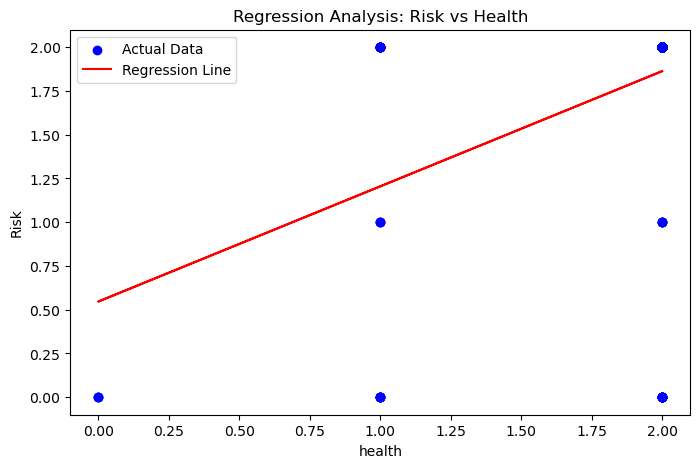

In [361]:
# Independent and dependent variables
x = df['health']
y = df['Risk']

# Add constant for intercept in the model
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()
print(model.summary())

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(df['health'], df['Risk'], color='blue', label='Actual Data')
plt.plot(df['health'], model.predict(x), color='red', label='Regression Line')
plt.xlabel('health')
plt.ylabel('Risk')

plt.title('Regression Analysis: Risk vs Health')
plt.legend()
plt.show()


#####  Conclusion: Health significantly influences Risk, but the model explains only 17.6% of the variance, suggesting other factors might be at play.

### Let's check the correlation between "Attendance" and "Risk"

In [362]:

df.head()

,health,attendance,scholarship,gpa1,gpa2,gpa3,cgpa,Risk
0,2,Excellent,Safe,3.44,3.25,3.65,3.65,2
1,2,Poor,Uncertain,3.44,3.25,2.28,2.28,0
2,2,Excellent,Safe,3.21,2.67,3.33,3.42,2
3,2,Excellent,Safe,3.44,2.95,3.33,3.43,2
4,2,Excellent,Safe,3.72,3.25,3.42,3.51,2


In [363]:
non_numeric = df[pd.to_numeric(df['attendance'], errors='coerce').isna()]
print(non_numeric['attendance'].unique())


['Excellent' 'Poor' 'Irregular']


In [364]:
df['attendance'].value_counts()

attendance
Excellent    165
Irregular     33
Poor           6
Name: count, dtype: int64

In [365]:
df['attendance'] = df['attendance'].map({'Excellent': 2, 'Irregular': 1, 'Poor': 0})

In [366]:
df['attendance'] = df['attendance'].fillna(0).astype(int)


In [367]:
df['attendance'] = pd.to_numeric(df['attendance'], errors='coerce').fillna(0).astype(int)

In [368]:
df['attendance'].dtype

dtype('int32')

                            OLS Regression Results                            
Dep. Variable:                   Risk   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     228.7
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           4.77e-35
Time:                        06:32:25   Log-Likelihood:                -111.76
No. Observations:                 204   AIC:                             227.5
Df Residuals:                     202   BIC:                             234.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1203      0.113      1.065      0.2

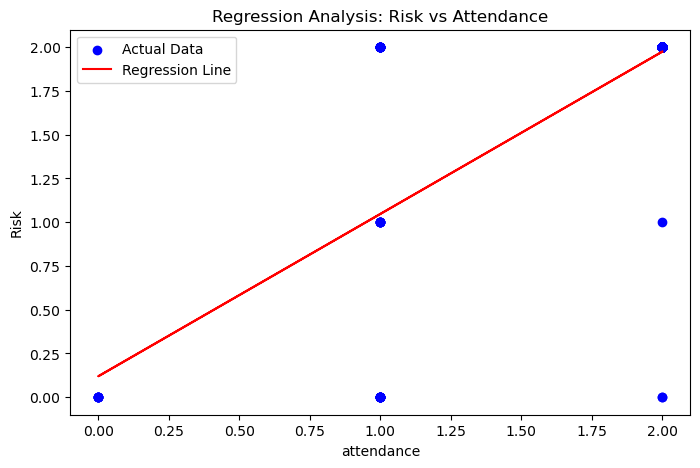

In [369]:
x = df['attendance']
y = df['Risk']

# Add constant for intercept in the model
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()
print(model.summary())

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(df['attendance'], df['Risk'], color='blue', label='Actual Data')
plt.plot(df['attendance'], model.predict(x), color='red', label='Regression Line')
plt.xlabel('attendance')
plt.ylabel('Risk')

plt.title('Regression Analysis: Risk vs Attendance')
plt.legend()
plt.show()


##### Attendance has a strong and significant positive impact on Risk. 

In [370]:
#### I think will goes to 'scholarship status' as well for GPA's and etc...,
#### ya I think will having the same effict and impact into Final student risk.

### let's change dytpe of 'scholarship status' and Start training our mosel

In [371]:
df['scholarship'].value_counts()

scholarship
Safe          117
Uncertain      82
Endangered      5
Name: count, dtype: int64

In [372]:
non_numeric = df[pd.to_numeric(df['scholarship'], errors='coerce').isna()]
print(non_numeric['scholarship'].unique())

['Safe' 'Uncertain' 'Endangered']


In [373]:
df['scholarship'] = df['scholarship'].map({'Safe': 2, 'Uncertain': 1, 'Endangered': 1})

In [374]:
df['scholarship'] = df['scholarship'].fillna(0).astype(int)

In [375]:
df['scholarship'] = pd.to_numeric(df['scholarship'], errors='coerce').fillna(0).astype(int)

In [376]:
df['attendance'].dtype

dtype('int32')

## Done


# Let's Start Model Training Process

In [377]:
df.head()

,health,attendance,scholarship,gpa1,gpa2,gpa3,cgpa,Risk
0,2,2,2,3.44,3.25,3.65,3.65,2
1,2,0,1,3.44,3.25,2.28,2.28,0
2,2,2,2,3.21,2.67,3.33,3.42,2
3,2,2,2,3.44,2.95,3.33,3.43,2
4,2,2,2,3.72,3.25,3.42,3.51,2


In [378]:
df.columns

Index(['health', 'attendance', 'scholarship', 'gpa1', 'gpa2', 'gpa3', 'cgpa',
       'Risk'],
      dtype='object')

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 204
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   health       204 non-null    int32  
 1   attendance   204 non-null    int32  
 2   scholarship  204 non-null    int32  
 3   gpa1         204 non-null    float64
 4   gpa2         204 non-null    float64
 5   gpa3         204 non-null    float64
 6   cgpa         204 non-null    float64
 7   Risk         204 non-null    int32  
dtypes: float64(4), int32(4)
memory usage: 11.2 KB


In [380]:
## All looks well organized, Let's Go

In [381]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [382]:
X = df.drop('Risk', axis=1)
y = df['Risk']

# Split dataset into 50% training and 50% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [383]:
# Import necessary libraries

import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

 

# Check for missing values
if df.isnull().sum().any():
    print("Warning: Dataset contains missing values. Consider handling them.")

# Preprocess categorical columns
label_encoders = {}
for col in ['health', 'attendance','scholarship']:
    if df[col].dtype == 'object':  # Only encode if it's categorical
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Define features and target
features = ['health', 'attendance','scholarship', 'gpa1', 'gpa2', 'gpa3', 'cgpa']
target = 'Risk'

# Ensure all features exist in the dataset
if not all(col in df.columns for col in features + [target]):
    missing_cols = [col for col in features + [target] if col not in df.columns]
    print(f"Error: Missing columns in dataset: {missing_cols}")
else:
    X = df[features]
    y = df[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Calculate accuracy
    accuracy = model.score(X_test, y_test)
    print("Model Accuracy:", accuracy)

    # Save the model (ensure the directory exists)
    model_path = r'C:\Users\HP\Documents\Projects Data\ML Project\tree_model.pkl'
    joblib.dump(model, model_path)
    print(f"Model saved successfully at: {model_path}")

    # Verify scikit-learn version
    print("Scikit-Learn Version:", sklearn.__version__)



 

Model Accuracy: 0.975609756097561
Model saved successfully at: C:\Users\HP\Documents\Projects Data\ML Project\tree_model.pkl
Scikit-Learn Version: 1.3.0


In [384]:
import sklearn
print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.3.0


In [385]:
print(model.feature_names_in_)


['health' 'attendance' 'scholarship' 'gpa1' 'gpa2' 'gpa3' 'cgpa']


In [386]:
df.head(8)

,health,attendance,scholarship,gpa1,gpa2,gpa3,cgpa,Risk
0,2,2,2,3.44,3.25,3.65,3.65,2
1,2,0,1,3.44,3.25,2.28,2.28,0
2,2,2,2,3.21,2.67,3.33,3.42,2
3,2,2,2,3.44,2.95,3.33,3.43,2
4,2,2,2,3.72,3.25,3.42,3.51,2
5,2,2,2,3.33,3.25,3.54,3.54,2
6,2,1,2,3.56,3.25,3.60,3.60,2
7,2,2,2,3.70,3.25,3.60,3.58,2


In [387]:
import sys
print(sys.executable)


c:\ProgramData\anaconda3\python.exe


In [388]:
df.dtypes

health           int32
attendance       int32
scholarship      int32
gpa1           float64
gpa2           float64
gpa3           float64
cgpa           float64
Risk             int32
dtype: object